In [1]:
from igraph import *
import numpy as np

In [2]:
graphcsv = open('/Users/panktibhalani/Downloads/edges_sampled_map_2K.csv', 'r')
edges = graphcsv.readlines()
numofnodes = set()
for edge in edges:
    listedge = edge.strip().split(",")
    numofnodes.add(listedge[0])
    numofnodes.add(listedge[1])
numofnodes = len(numofnodes)
answer = []

In [3]:
g = Graph()
g.add_vertices(numofnodes)
for edge in edges:
    edgelist = list(map(int, edge.strip().split(",")))
    edge = (edgelist[0],edgelist[1])
    g.add_edges([edge])

In [4]:
original_degree = np.array(g.degree())
num_edges = len(g.es)

In [5]:
def getbetweeness():

    numberofpaths = np.zeros((g.vcount(),g.vcount()), dtype=np.int)
    betweenness = np.zeros((g.vcount(),g.vcount()), dtype=np.float32)

    
    for i in range(g.vcount()):
        for j in range(i+1,g.vcount()):
            pathspasses = {}
            shortest_paths = g.get_all_shortest_paths(i,j,mode=OUT)
            numberofpaths[i][j] = len(shortest_paths)
            for shortest_path in shortest_paths:
                for k in range(1,len(shortest_path)):
                    l = shortest_path[k]
                    m = shortest_path[k-1]
                    if(l < m):
                        if((l,m) in pathspasses):
                            pathspasses[(l,m)] += 1
                        else:
                            pathspasses[(l,m)] = 1
                    else:
                        if((m,l) in pathspasses):
                            pathspasses[(m,l)] += 1
                        else:
                            pathspasses[(m,l)] = 1

            for keys in pathspasses.keys():
                betweenness[keys[0]][keys[1]] += pathspasses[keys] / numberofpaths[i][j]
                
        if(i % 50 == 0):
            print(i)
    return betweenness

In [6]:
def calculate_nodes_each_graph(memberships):
    memberships = np.array(memberships)
    result = []
    nodes = np.unique(memberships)
    for node in nodes:
        result.append(np.argwhere(memberships == node).flatten())
        
    return np.array(result)
    

In [7]:
def calculateModularity():
    
    modularity = float(0)
    degrees = np.array(g.degree())
    k = g.components()
    numgraphs = k.subgraphs()
    memberships = k.membership
    
    Mode = 0
    graphs_per_connections = calculate_nodes_each_graph(memberships)
    
    for graph in graphs_per_connections:
        B = 0
        Delta = 0
        for node in graph:
            B += degrees[node]
            Delta += original_degree[node]
            
        Mode += (float(B) - (float(Delta * Delta)/ float(2 * num_edges)))
    
    Mode = Mode/float(2 * num_edges)

    return (len(numgraphs),Mode)
    
    

In [8]:
def girvanewman():
    
    
    while(1):
        betweenness = getbetweeness()
        maxindex = np.argmax(betweenness)
        
        i = int(maxindex / int(g.vcount()))
        j =  (maxindex % g.vcount())
        
        maxval = betweenness[i][j]
        
        print(maxval)
        listofindices  = np.argwhere(betweenness == maxval)
        
        for indices in listofindices:
            g.delete_edges([(indices[0],indices[1])])
        
        a = calculateModularity()
        answer.append(a)
        print(a)
        if(len(g.es) == 0):
            break
        

In [24]:
girvanewman()

0
50
100
150
200
250
300
15.7620125
(150, 0.3077555363908258)
0
50
100
150
200
250
300
16.523565
(150, 0.3072788919675656)
0
50
100
150
200
250
300
19.055717
(150, 0.3068022475443053)
0
50
100
150
200
250
300
21.064573
(150, 0.30632560312104506)
0
50
100
150
200
250
300
24.384972
(150, 0.30584895869778483)
0
50
100
150
200
250
300
24.774656
(150, 0.30537231427452455)
0
50
100
150
200
250
300
25.062273
(150, 0.3048956698512643)
0
50
100
150
200
250
300
32.369923
(150, 0.3044190254280041)
0
50
100
150
200
250
300
41.08649
(150, 0.3039423810047438)
0
50
100
150
200
250
300
59.060963
(150, 0.30346573658148357)
0
50
100
150
200
250
300
94.0
(151, 0.30677396240098026)
0
50
100
150
200
250
300
15.408533
(151, 0.30629731797772003)
0
50
100
150
200
250
300
17.01796
(151, 0.30582067355445974)
0
50
100
150
200
250
300
17.874372
(151, 0.3053440291311995)
0
50
100
150
200
250
300
20.523594
(151, 0.3048673847079393)
0
50
100
150
200
250
300
21.867428
(151, 0.304390740284679)
0
50
100
150
200
250
300

0


KeyboardInterrupt: 

In [25]:
len(answer)

638

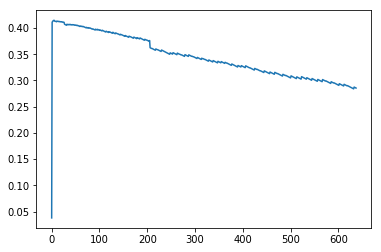

In [26]:
import matplotlib.pyplot as plt

Mods = []
#SubGraphs = []
for i in range(0,len(answer)):
    Mods.append(answer[i][1])
    #SubGraphs.append(answer[i][0])

plt.plot(Mods)
plt.show()